In [1]:
# Install basic modules and make sure they are available with the latest pip version.
# Always updating PIP could be either good or bad, you just have to choose one base on the situation around.

# I use --quiet and --no-warn-script-location to hide the output of my directory paths
import sys
import os

!{sys.executable} -m pip install --upgrade pip matplotlib numpy tensorflow-macos tensorflow-metal scikit-learn --quiet --no-warn-script-location

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import os
from PIL import Image
import glob

In [3]:
# Load all images and labels
dataset_path = os.path.join(os.getcwd().replace("investigation", "kaggledataset"), 'garbage_classification')

image_data = []
labels = []
class_names = sorted(os.listdir(dataset_path))
print(f"Classes: {class_names}")

for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in glob.glob(os.path.join(class_folder, "*.jpg")):
            try:
                # Open the image, resize, and normalize
                img = Image.open(img_file).convert("RGB").resize((256, 256))
                image_data.append(np.array(img) / 255.0)  # Normalize to 0-1 range
                labels.append(class_idx)
            except Exception as e:
                print(f"Error loading image {img_file}: {e}")

# Convert to NumPy arrays
image_data = np.array(image_data, dtype="float32")
labels = np.array(labels)

# One-hot encode the labels for CNN training
labels_one_hot = to_categorical(labels, num_classes=len(class_names))

# Split data into train/test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    image_data, labels_one_hot, test_size=0.2, random_state=42, stratify=labels
)

Classes: ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']


In [4]:
img_input = layers.Input(shape=(256, 256, 3))

# CNN architecture
x = layers.Conv2D(32, 3, activation=None)(img_input)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
output = layers.Dense(len(class_names), activation='softmax')(x)

cnn_model = Model(img_input, output)

cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.0001),
    metrics=['acc']
)

# Train CNN
cnn_model.fit(
    train_data,
    train_labels,
    epochs=30,  # Reduced for demonstration
    batch_size=32,
    validation_data=(test_data, test_labels)
)

2024-12-12 15:39:42.586247: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-12-12 15:39:42.586272: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 48.00 GB
2024-12-12 15:39:42.586281: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 18.00 GB
2024-12-12 15:39:42.586294: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-12 15:39:42.586305: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/30


2024-12-12 15:39:50.303138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


388/388 ━━━━━━━━━━━━━━━━━━━━ 44s 108ms/step - acc: 0.6094 - loss: 1.2758 - val_acc: 0.5450 - val_loss: 1.4117
Epoch 2/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - acc: 0.8611 - loss: 0.4477 - val_acc: 0.7390 - val_loss: 0.8195
Epoch 3/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - acc: 0.9510 - loss: 0.1778 - val_acc: 0.7396 - val_loss: 0.8717
Epoch 4/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - acc: 0.9841 - loss: 0.0731 - val_acc: 0.7325 - val_loss: 0.9369
Epoch 5/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 39s 102ms/step - acc: 0.9913 - loss: 0.0417 - val_acc: 0.7535 - val_loss: 0.9677
Epoch 6/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - acc: 0.9966 - loss: 0.0240 - val_acc: 0.7042 - val_loss: 1.2862
Epoch 7/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - acc: 0.9970 - loss: 0.0161 - val_acc: 0.7580 - val_loss: 0.9367
Epoch 8/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - acc: 0.9993 - loss: 0.0075 - val_acc: 0.7470 - val_loss: 1.0077
Epoch 9/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 40s

In [ ]:
# Extract features using CNN
feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.layers[-2].output)

train_features = feature_extractor.predict(train_data)
test_features = feature_extractor.predict(test_data)

# Train an SVM on the extracted features
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True)
svm_model.fit(train_features, np.argmax(train_labels, axis=1))

# Evaluate
y_pred = svm_model.predict(test_features)
print(f"Accuracy: {accuracy_score(np.argmax(test_labels, axis=1), y_pred)}")
print(classification_report(np.argmax(test_labels, axis=1), y_pred, target_names=class_names))

388/388 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Accuracy: 0.7757009345794392
              precision    recall  f1-score   support

     battery       0.76      0.69      0.72       189
  biological       0.74      0.73      0.73       197
 brown-glass       0.75      0.66      0.70       122
   cardboard       0.78      0.78      0.78       178
     clothes       0.87      0.96      0.91      1065
 green-glass       0.84      0.86      0.85       126
       metal       0.64      0.49      0.56       154
       paper       0.80      0.77      0.78       210
     plastic       0.55      0.47      0.51       173
       shoes       0.72      0.70      0.71       395
       trash       0.69      0.73      0.71       139
 white-glass       0.59      0.59      0.59       155

    accuracy                           0.78      3103
   macro avg       0.73      0.70      0.71      3103
weighted avg       0.77      0.78      0.77      3103



AttributeError: 'SVC' object has no attribute 'summary'

97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Overall Test Accuracy: 0.78


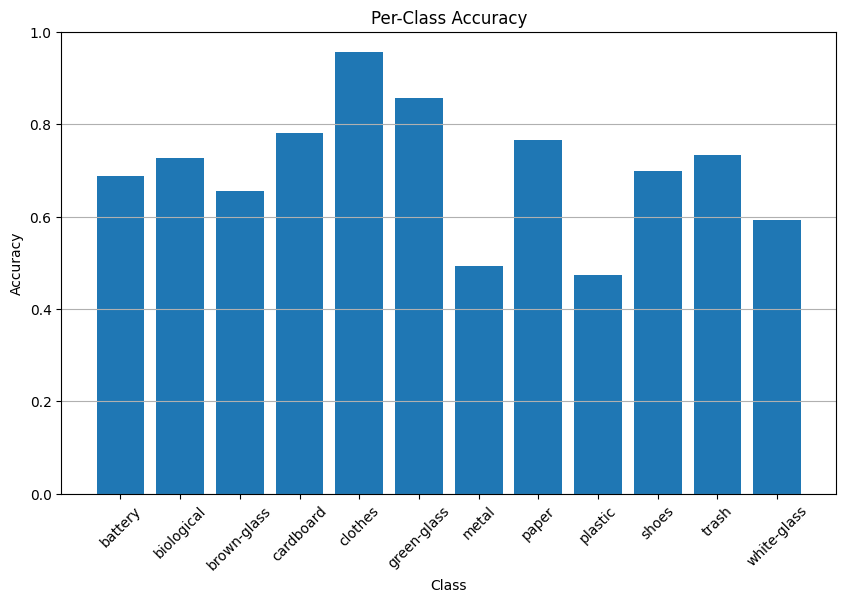

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Use feature extractor to get features from the test data
test_features = feature_extractor.predict(test_data)

# Get predictions for the test features
predicted_classes = svm_model.predict(test_features)

# Convert true labels from one-hot encoding to class indices
true_classes = np.argmax(test_labels, axis=1)

# Calculate overall accuracy
overall_accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
print(f"Overall Test Accuracy: {overall_accuracy:.2f}")

# Calculate per-class accuracy
num_classes = len(class_names)
class_accuracies = []
for class_index in range(num_classes):
    indices = np.where(true_classes == class_index)[0]
    class_correct = np.sum(predicted_classes[indices] == true_classes[indices])
    class_accuracy = class_correct / len(indices) if len(indices) > 0 else 0
    class_accuracies.append(class_accuracy)

# Plot per-class accuracy
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_accuracies)
plt.title("Per-Class Accuracy")
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


In [3]:
# Investigating model
import tensorflow as tf

# Load your model
model = tf.keras.models.load_model('saved_models/garbage_classification_model_79_tf_keras.keras')

# Save the model in SavedModel format
model.export('saved_models/garbage_classification_model_79_tf_keras')

INFO:tensorflow:Assets written to: saved_models/garbage_classification_model_79_tf_keras/assets


INFO:tensorflow:Assets written to: saved_models/garbage_classification_model_79_tf_keras/assets


Saved artifact at 'saved_models/garbage_classification_model_79_tf_keras'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 12), dtype=tf.float32, name=None)
Captures:
  14657741296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14657742880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14657742000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14657741120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14657742352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14657742176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14657743056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14657744112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14657743232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14657740768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14657743584: Tens

In [6]:
print("Input Tensor:")
for input_tensor in model.inputs:
    print(f"Name: {input_tensor.name}, Shape: {input_tensor.shape}, Dtype: {input_tensor.dtype}")

print("\nOutput Tensor:")
for output_tensor in model.outputs:
    print(f"Name: {output_tensor.name}, Shape: {output_tensor.shape}, Dtype: {output_tensor.dtype}")

Input Tensor:
Name: input_layer, Shape: (None, 256, 256, 3), Dtype: float32

Output Tensor:
Name: keras_tensor_143, Shape: (None, 12), Dtype: float32


In [7]:
# Load the Keras model
saved_model = tf.saved_model.load('saved_models/garbage_classification_model_79_tf_keras')

# Check input tensor details
for key, tensor in saved_model.signatures['serving_default'].structured_input_signature[1].items():
    print(f"Input Name: {tensor.name}, Shape: {tensor.shape}, Dtype: {tensor.dtype}")

# Check output tensor details
for key, tensor in saved_model.signatures['serving_default'].structured_outputs.items():
    print(f"Output Name: {tensor.name}, Shape: {tensor.shape}, Dtype: {tensor.dtype}")

Input Name: input_layer, Shape: (None, 256, 256, 3), Dtype: <dtype: 'float32'>
Output Name: output_0, Shape: (None, 12), Dtype: <dtype: 'float32'>
